In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as ex

In [2]:
df=pd.read_csv('Customer-Churn-Records.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#checking for nulls in the dataset
for c in df:
    print(c)
    print(df[c].isna().sum())

RowNumber
0
CustomerId
0
Surname
0
CreditScore
0
Geography
0
Gender
0
Age
0
Tenure
0
Balance
0
NumOfProducts
0
HasCrCard
0
IsActiveMember
0
EstimatedSalary
0
Exited
0
Complain
0
Satisfaction Score
0
Card Type
0
Point Earned
0


In [5]:
#rename the features so they are easier to deal with and drop the row number feature. it is irrelivant.
df.drop(columns='RowNumber', inplace=True)
df.rename(columns={'CustomerId': 'customer_id', 'Surname': 'surname', 'CreditScore': 'credit_score',
                   'Geography': 'geography', 'Gender': 'gender',
                   'Age': 'age', 'Tenure': 'tenure', 'Balance': 'balance',
                   'NumOfProducts': 'num_products', 'HasCrCard': 'has_cr_card',
                   'IsActiveMember': 'is_active_member',
                   'EstimatedSalary': 'estimated_salary', 'Exited': 'churn',
                   'Complain': 'complain', 'Satisfaction Score': 'satisfaction_score',
                   'Card Type': 'card_type', 'Point Earned': 'point_earned'}, inplace=True)

In [6]:
df.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## There is not much preperation for this data set so we will get into exploration

In [7]:
#split into train, val and test. stratify on churn because it's our target
train, val, test= ex.tts(df, 'churn')

In [8]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392


In [9]:
train.shape, val.shape, test.shape

((7200, 17), (1800, 17), (1000, 17))

In [10]:
#I want to start by looking at points earned and credit score

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Are customers with less points earned more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average points earned by customers that churn and customers that don't.</dd>
        <dd>- $H_a$: The average points earned of customers that have not churned is significantlly higher than the average points earnd of customers that have churned.</dd>
    </dl>
</div>

In [11]:
no_churn= train[train['churn']==0]

In [12]:
no_churn_points=no_churn['point_earned']

<AxesSubplot:xlabel='point_earned', ylabel='Count'>

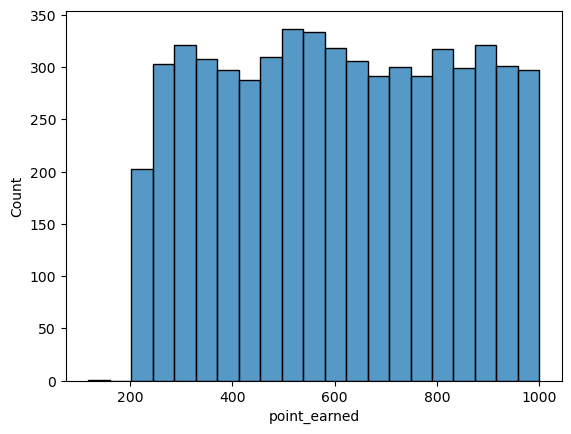

In [13]:
sns.histplot(no_churn_points)

In [14]:
churned=train[train['churn']==1]

In [15]:
churned_points= churned['point_earned']

<AxesSubplot:xlabel='point_earned', ylabel='Count'>

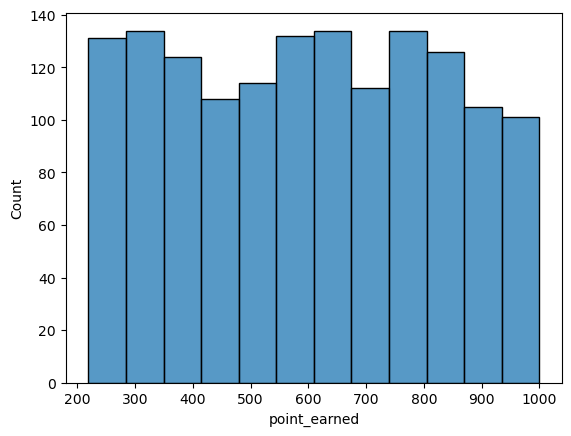

In [16]:
sns.histplot(churned_points)

In [17]:
alpha=0.05

In [18]:
stats.ttest_ind(no_churn_points, churned_points, alternative='greater')

Ttest_indResult(statistic=1.3064811721984397, pvalue=0.09571536013341075)

* the p-value is not lower than the alpha so we do not reject the null hypothesis
* `point_earned` is not a good predictor/driver of churn

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Are customers with lower credit score more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average credit score of customers that churn and customers that don't.</dd>
        <dd>- $H_a$: The average credit score of customers that have not churned is significantlly higher than the average credit score of customers that have churned.</dd>
    </dl>
</div>

In [19]:
no_churn_cs= no_churn['credit_score']

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

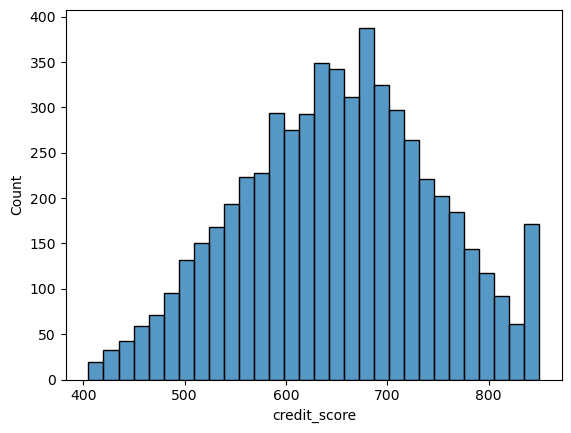

In [20]:
sns.histplot(no_churn_cs)

In [21]:
churn_cs= churned['credit_score']

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

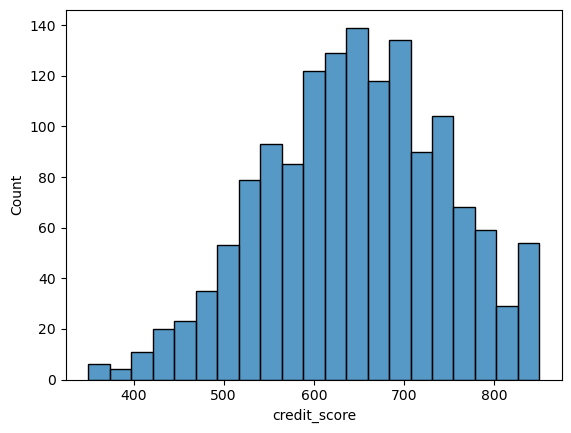

In [22]:
sns.histplot(churn_cs)

In [23]:
stats.ttest_ind(no_churn_cs, churn_cs, alternative='greater')

Ttest_indResult(statistic=1.8632508788985662, pvalue=0.03123383687715922)

In [24]:
no_churn_cs.mean(), churn_cs.mean()

(650.888772845953, 645.5903780068728)

* the p-value is lower than the alpha of 0.05 so we can reject the null hypothesis
* the actual difference in the means is about 5 points on average and in most cases 5 points will not impact an individual in any way
* though is is statistically significant, is is not a driver of customer churn.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Are customers in a certain country more likely to churn?</dt>
        <dd>- $H_0$: Wether customers will churn or not is not dependent on the geography.</dd>
        <dd>- $H_a$: Wether customers will churn or not is dependent on the geography.</dd>
    </dl>
</div>

In [25]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392


In [26]:
train['geography'].value_counts()

France     3605
Spain      1798
Germany    1797
Name: geography, dtype: int64

In [33]:
france=churned[churned['geography']=='France']
spain=churned[churned['geography']=='Spain']
germany=churned[churned['geography']=='Germany']

In [28]:
france.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
245,15797219,Ifesinachi,635,France,Female,40,10,123497.58,1,1,0,131953.23,1,1,5,GOLD,774
2439,15586976,Alexeeva,566,France,Female,42,6,0.00,1,1,0,180702.12,1,1,3,GOLD,420
3732,15689598,Dean,722,France,Male,46,6,0.00,1,1,1,93917.68,1,1,3,GOLD,747
1047,15793949,Cheng,726,France,Female,48,4,0.00,1,1,0,114020.06,1,1,2,DIAMOND,283
2518,15759436,Aksenov,758,France,Female,50,2,95813.76,3,1,1,67944.09,1,1,2,PLATINUM,525


In [29]:
france.shape

(573, 17)

In [ ]:
# need to run a chi squared